In [1]:
import numpy as np
import scipy
from scipy import signal
import scipy.io.wavfile

In [105]:
#rate, data = scipy.io.wavfile.read("./Data/DataSetLoader/imAlright.wav")
rate, data = scipy.io.wavfile.read("/Users/MagdBayoumi/Downloads/30____________________________________________________.wav")

In [106]:
f, t, Sxx = signal.stft(data,rate,nperseg=1000)
magnitude = np.abs(Sxx)
phase = np.unwrap(np.angle(Sxx),axis=-2)

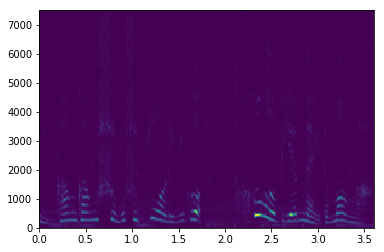

In [114]:
plt.pcolormesh(t,f,magnitude)
plt.ylim([0,7500]);

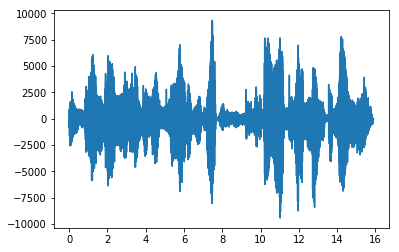

In [108]:
Zxx = magnitude * np.exp(1j * phase)
t2, xrec = signal.istft(Zxx, fs)
plt.plot(t2,xrec)

In [80]:
import IPython.display as display

In [109]:
display.Audio(xrec,rate=rate)

In [43]:
magnitude = np.load("./Data/magdnitude_imAlright.npy")
phase = np.load("./Data/phase_imAlright.npy")
time = np.load("./Data/time_imAlright.npy")
freq = np.load("./Data/freq_imAlright.npy")
rate = np.load("./Data/rate_imAlright.npy")

In [44]:
import matplotlib.pyplot as plt

In [48]:
phase.shape

(1942186, 2, 3)

In [46]:
time

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05])

In [47]:
freq

array([    0., 22050.])

In [49]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power),                          size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

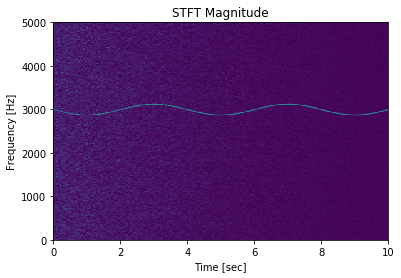

In [50]:
f, t, Zxx = signal.stft(x, fs, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [54]:
Zxx.shape

(501, 201)